Лабораторная работа 2 Системы ОДУ (жесткий вариант)
 Решить систему ОДУ следующими методами:

0) Попробовать использовать для решения один из методов 3 или 4 порядка лабы 1 .

1) Неявный метод Рунге-Кутта 3 порядка и выше (можно двух стадийный метод найти) 

2) Неявный метод Адамса или ФДН (методы Гира) 3 порядка и выше (внимание разгонный участок!) 

3) метод Розенброка-Ваннера 2 и 3 порядка или выше (внимание автономная или неавтономная система ОДУ!) 

4) методы Гира в представлении Нордсика 

ВАЖНО! 1.Если удалось взять явной схемой , то зафиксировать h опытным путем, при котором наблюдается устойчивая картина. 

2. Для 1) , 2) , 3) - подобрать h опытным путем, для теста метода можно пробовать сначала "скормить" нежесткую систему , решенную в Лабе1


![Задача](task.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(y, epsilon):
    x, y_val, alpha = y
    fx = x * (1 - 0.5 * x - (2 / (7 * alpha ** 2)) * y_val)
    fy = y_val * (2 * alpha - 3.5 * alpha ** 2 * x - 0.5 * y_val)
    falpha = epsilon * (2 - 7 * alpha * x)
    return np.array([fx, fy, falpha])

def jacobian_f(y, epsilon):
    x, y_val, alpha = y
    df_dx = np.array([
        1 - x - (2 * y_val) / (7 * alpha ** 2),
        -3.5 * alpha ** 2 * y_val,
        -7 * epsilon * alpha
    ])
    df_dy = np.array([
        - (2 * x) / (7 * alpha ** 2),
        2 * alpha - 3.5 * alpha ** 2 * x - y_val,
        0
    ])
    df_dalpha = np.array([
        (4 * x * y_val) / (7 * alpha ** 3),
        y_val * (2 - 7 * alpha * x),
        -7 * epsilon * x
    ])
    return np.column_stack((df_dx, df_dy, df_dalpha))



#  Явный РК 4 порядка

/var/folders/wf/668bg_rx2yz5wvf7tvqh_bm40000gq/T/ipykernel_10327/3892303838.py:4: RuntimeWarning: overflow encountered in scalar multiply
  fy = y_val * (2 * alpha - 3.5 * alpha ** 2 * x - 0.5 * y_val)
/var/folders/wf/668bg_rx2yz5wvf7tvqh_bm40000gq/T/ipykernel_10327/3892303838.py:4: RuntimeWarning: invalid value encountered in scalar subtract
  fy = y_val * (2 * alpha - 3.5 * alpha ** 2 * x - 0.5 * y_val)
/var/folders/wf/668bg_rx2yz5wvf7tvqh_bm40000gq/T/ipykernel_10327/3892303838.py:3: RuntimeWarning: overflow encountered in scalar power
  fx = x * (1 - 0.5 * x - (2 / (7 * alpha ** 2)) * y_val)
/var/folders/wf/668bg_rx2yz5wvf7tvqh_bm40000gq/T/ipykernel_10327/3892303838.py:4: RuntimeWarning: overflow encountered in scalar power
  fy = y_val * (2 * alpha - 3.5 * alpha ** 2 * x - 0.5 * y_val)


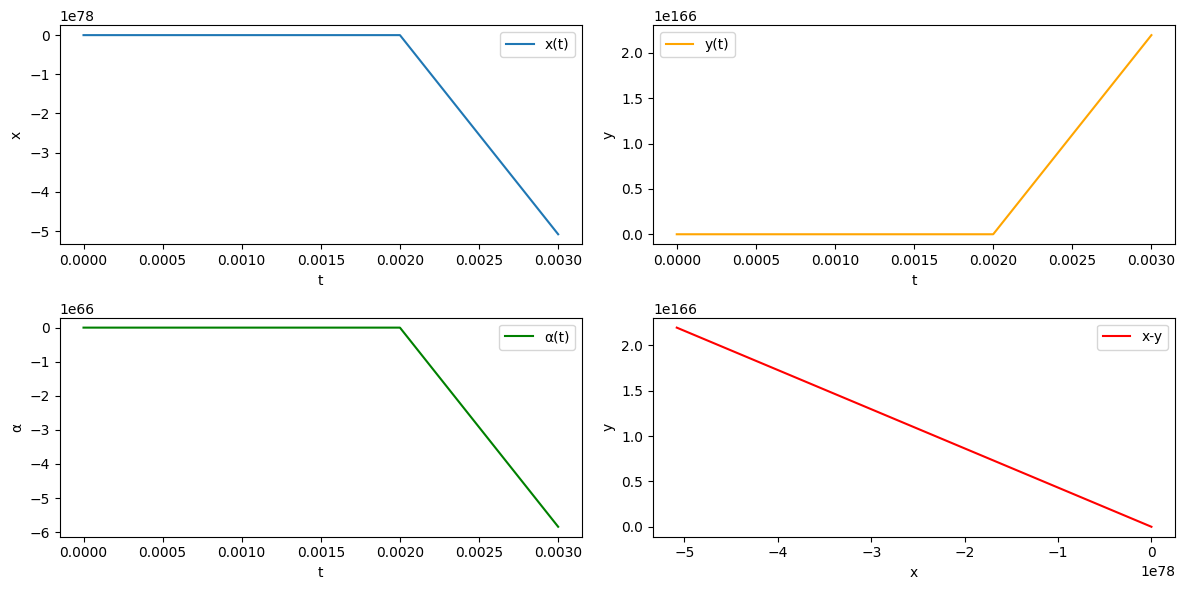

In [80]:
epsilon = 0.01
Tk = 1500  
h = 0.001    
N = int(Tk / h)

x0 = 1.0   
y0 = 5.0   
alpha0 = 0.01  

t_values = np.linspace(0, Tk, N+1)
y_values = np.zeros((N+1, 3))  
y_values[0, :] = [x0, y0, alpha0]

for n in range(N):
    y_n = y_values[n, :]
    k1 = f(y_n, epsilon)
    k2 = f(y_n + 0.5 * h * k1, epsilon)
    k3 = f(y_n + 0.5 * h * k2, epsilon)
    k4 = f(y_n + h * k3, epsilon)
    y_next = y_n + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    y_values[n+1, :] = y_next

x_values = y_values[:, 0]
y_plot_values = y_values[:, 1]
alpha_values = y_values[:, 2]

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(t_values, x_values, label='x(t)')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t_values, y_plot_values, label='y(t)', color='orange')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(t_values, alpha_values, label='α(t)', color='green')
plt.xlabel('t')
plt.ylabel('α')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(x_values, y_plot_values, label='x-y', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

# Неявный метод Рунге-Кутта 3 порядка

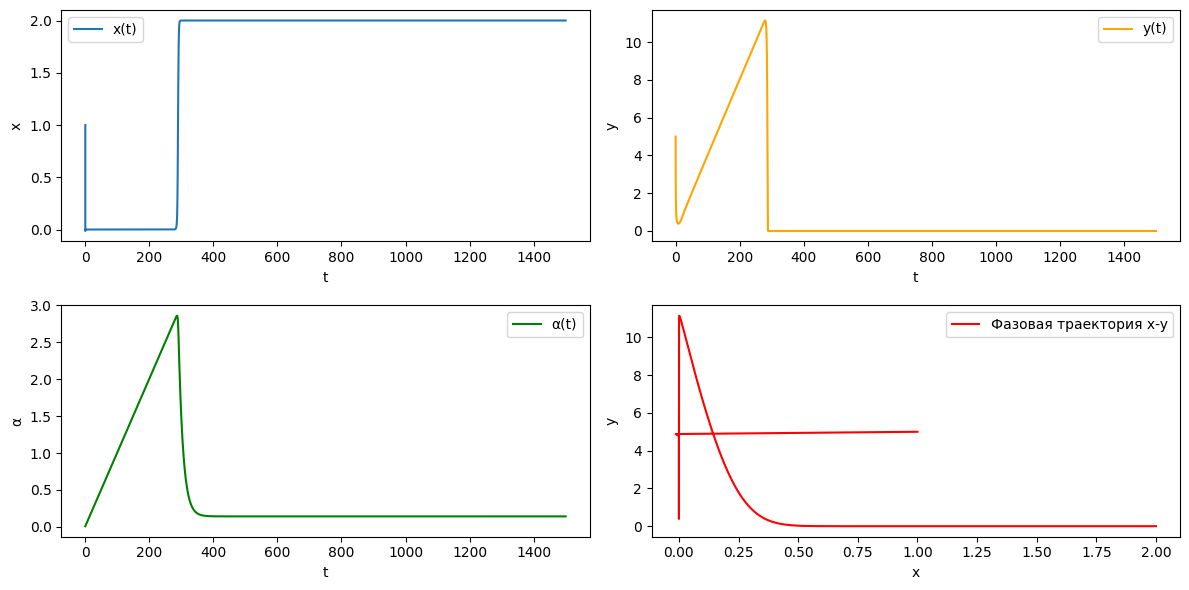

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

epsilon = 0.005
Tk = 1500  
h = 0.01   
N = int(Tk / h)  

x0 = 1.0   
y0 = 5.0   
alpha0 = 0.01 

t_values = np.linspace(0, Tk, N+1)
x_values = np.zeros(N+1)
y_values = np.zeros(N+1)
alpha_values = np.zeros(N+1)

x_values[0] = x0
y_values[0] = y0
alpha_values[0] = alpha0

a11 = 5/12
a12 = -1/12
a21 = 3/4
a22 = 1/4
b1 = 3/4
b2 = 1/4
c1 = 1/3
c2 = 1

for n in range(N):
    y_n = np.array([x_values[n], y_values[n], alpha_values[n]])
    
    k1 = np.zeros(3)
    k2 = np.zeros(3)
    k = np.concatenate((k1, k2))
    
    max_iter = 10
    tol = 1e-6
    for iteration in range(max_iter):
        s1 = y_n + h * (a11 * k[:3] + a12 * k[3:])
        s2 = y_n + h * (a21 * k[:3] + a22 * k[3:])
        
        f_s1 = f(s1, epsilon)
        f_s2 = f(s2, epsilon)
        G1 = k[:3] - f_s1
        G2 = k[3:] - f_s2
        G = np.concatenate((G1, G2))
        
        if np.linalg.norm(G, ord=2) < tol:
            break
        
        J11 = np.eye(3) - h * a11 * jacobian_f(s1, epsilon)
        J12 = - h * a12 * jacobian_f(s1, epsilon)
        J21 = - h * a21 * jacobian_f(s2, epsilon)
        J22 = np.eye(3) - h * a22 * jacobian_f(s2, epsilon)
        
        J_top = np.hstack((J11, J12))
        J_bottom = np.hstack((J21, J22))
        J = np.vstack((J_top, J_bottom))
        
        delta_k = solve(J, -G)
        
        k += delta_k
        
    else:
        print(f"Метод Ньютона не сошелся на шаге {n}, итерация {iteration}")
    
    y_n_plus1 = y_n + h * (b1 * k[:3] + b2 * k[3:])
    x_values[n+1], y_values[n+1], alpha_values[n+1] = y_n_plus1

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(t_values, x_values, label='x(t)')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t_values, y_values, label='y(t)', color='orange')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(t_values, alpha_values, label='α(t)', color='green')
plt.xlabel('t')
plt.ylabel('α')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(x_values, y_values, label='Фазовая траектория x-y', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

# Неявный метод Адамса или ФДН (методы Гира) 3 порядка и выше (внимание разгонный участок!) 

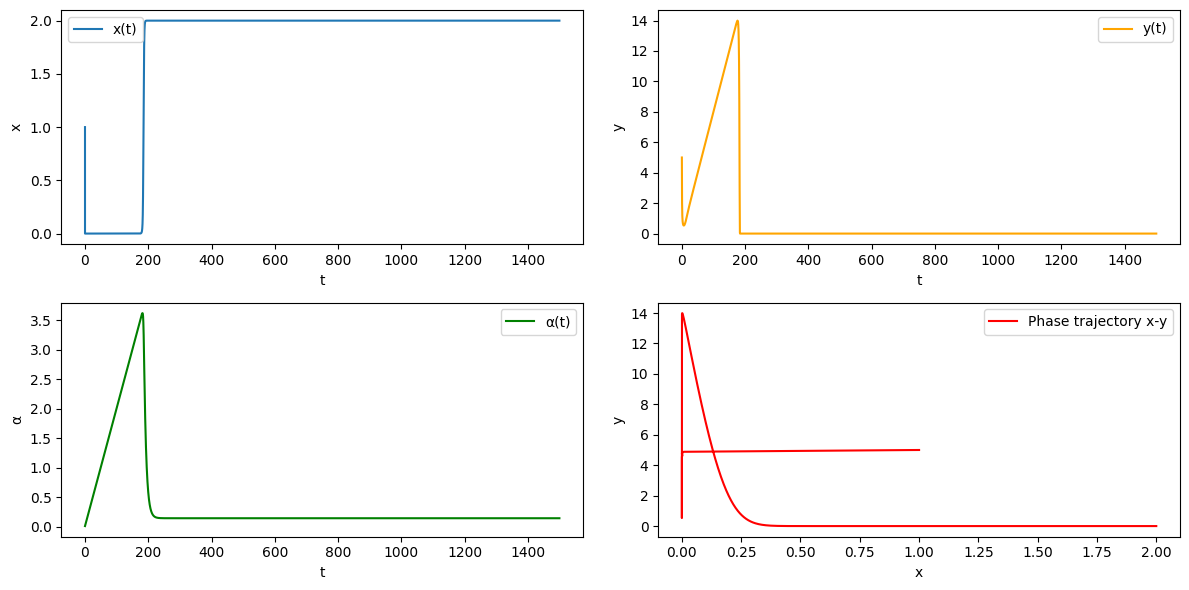

In [60]:
epsilon = 0.01
Tk = 1500  
h = 0.01    
N = int(Tk / h)  

x0 = 1.0     # x0 ∈ [0,3]
y0 = 5.0     # y0 ∈ [0,15]
alpha0 = 0.01  # α0 << 1

t_values = np.linspace(0, Tk, N+1)
x_values = np.zeros(N+1)
y_values = np.zeros(N+1)
alpha_values = np.zeros(N+1)

x_values[0] = x0
y_values[0] = y0
alpha_values[0] = alpha0

def implicit_euler_step(y_n, h, epsilon):
    max_iter = 10
    tol = 1e-6
    y_guess = y_n.copy()  
    for _ in range(max_iter):
        G = y_guess - y_n - h * f(y_guess, epsilon)
        if np.linalg.norm(G, ord=2) < tol:
            break
        J = np.eye(3) - h * jacobian_f(y_guess, epsilon)
        delta_y = np.linalg.solve(J, -G)
        y_guess += delta_y
    else:
        print("Warning: Newton's method did not converge in implicit Euler step")
    return y_guess

y_n = np.array([x_values[0], y_values[0], alpha_values[0]])
y1 = implicit_euler_step(y_n, h, epsilon)
x_values[1], y_values[1], alpha_values[1] = y1

y_n = y1
y2 = implicit_euler_step(y_n, h, epsilon)
x_values[2], y_values[2], alpha_values[2] = y2

a0 = 11/6
a1 = -3
a2 = 3/2
a3 = -1/3

for n in range(2, N):
    y_n0 = np.array([x_values[n], y_values[n], alpha_values[n]])
    y_n1 = np.array([x_values[n-1], y_values[n-1], alpha_values[n-1]])
    y_n2 = np.array([x_values[n-2], y_values[n-2], alpha_values[n-2]])

    y_guess = y_n0.copy()

    max_iter = 10
    tol = 1e-6
    for iteration in range(max_iter):
        G = (a0 * y_guess + a1 * y_n0 + a2 * y_n1 + a3 * y_n2) / h - f(y_guess, epsilon)

        if np.linalg.norm(G, ord=2) < tol:
            break

        J = (a0 / h) * np.eye(3) - jacobian_f(y_guess, epsilon)

        delta_y = np.linalg.solve(J, -G)

        y_guess += delta_y

    else:
        print(f"Warning: Newton's method did not converge at time step {n}, iteration {iteration}")

    x_values[n+1], y_values[n+1], alpha_values[n+1] = y_guess

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(t_values, x_values, label='x(t)')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t_values, y_values, label='y(t)', color='orange')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(t_values, alpha_values, label='α(t)', color='green')
plt.xlabel('t')
plt.ylabel('α')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(x_values, y_values, label='Phase trajectory x-y', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

# Метод Розенброка-Ваннера 3-го порядка для автономной системы


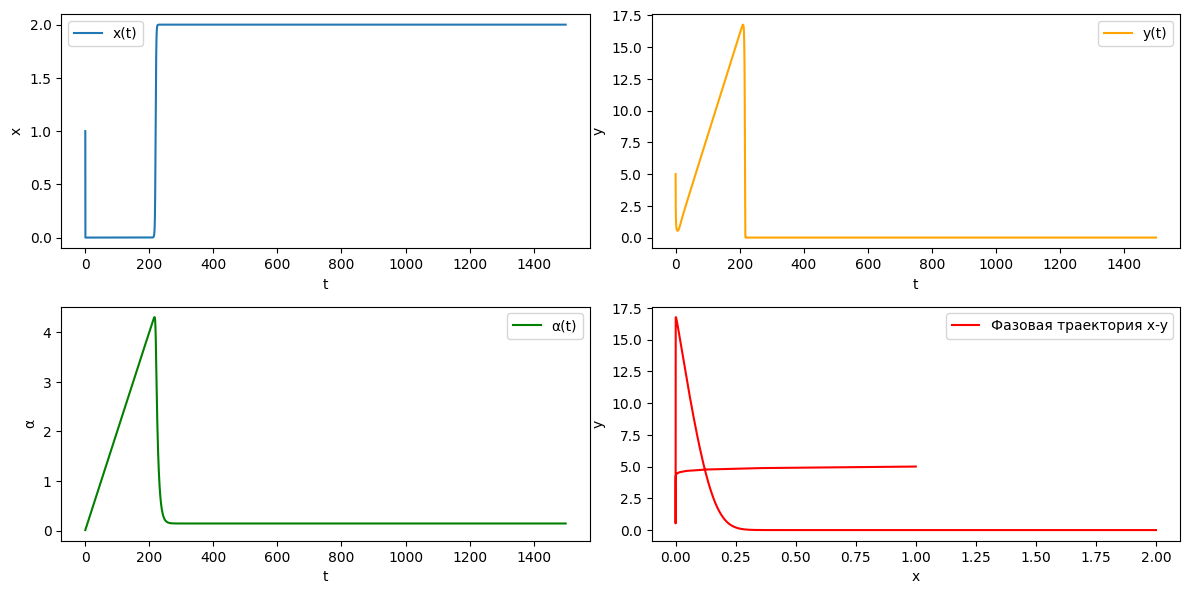

In [67]:
epsilon = 0.01
Tk = 1500  
h = 0.01    
N = int(Tk / h)  

x0 = 1.0
y0 = 5.0
alpha0 = 0.01

t_values = np.linspace(0, Tk, N+1)
x_values = np.zeros(N+1)
y_values = np.zeros(N+1)
alpha_values = np.zeros(N+1)

x_values[0] = x0
y_values[0] = y0
alpha_values[0] = alpha0

for n in range(N):
    y_n = np.array([x_values[n], y_values[n], alpha_values[n]])
    J = jacobian_f(y_n, epsilon)
    
    gamma1 = 1/2
    gamma2 = 1/2
    gamma3 = 1/2
    a21 = 1/2
    a31 = 0
    a32 = 1/2
    b1 = 1/6
    b2 = 2/3
    b3 = 1/6
    
    A1 = np.eye(3) - h * gamma1 * J
    rhs1 = f(y_n, epsilon)
    k1 = np.linalg.solve(A1, rhs1)
    
    A2 = np.eye(3) - h * gamma2 * J
    rhs2 = f(y_n + a21 * h * k1, epsilon)
    k2 = np.linalg.solve(A2, rhs2)
    
    A3 = np.eye(3) - h * gamma3 * J
    rhs3 = f(y_n + a31 * h * k1 + a32 * h * k2, epsilon)
    k3 = np.linalg.solve(A3, rhs3)
    
    y_next = y_n + h * (b1 * k1 + b2 * k2 + b3 * k3)
    x_values[n+1], y_values[n+1], alpha_values[n+1] = y_next

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(t_values, x_values, label='x(t)')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t_values, y_values, label='y(t)', color='orange')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(t_values, alpha_values, label='α(t)', color='green')
plt.xlabel('t')
plt.ylabel('α')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(x_values, y_values, label='Фазовая траектория x-y', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

# Неявный метод Гира 3-го порядка в представлении Нордсика


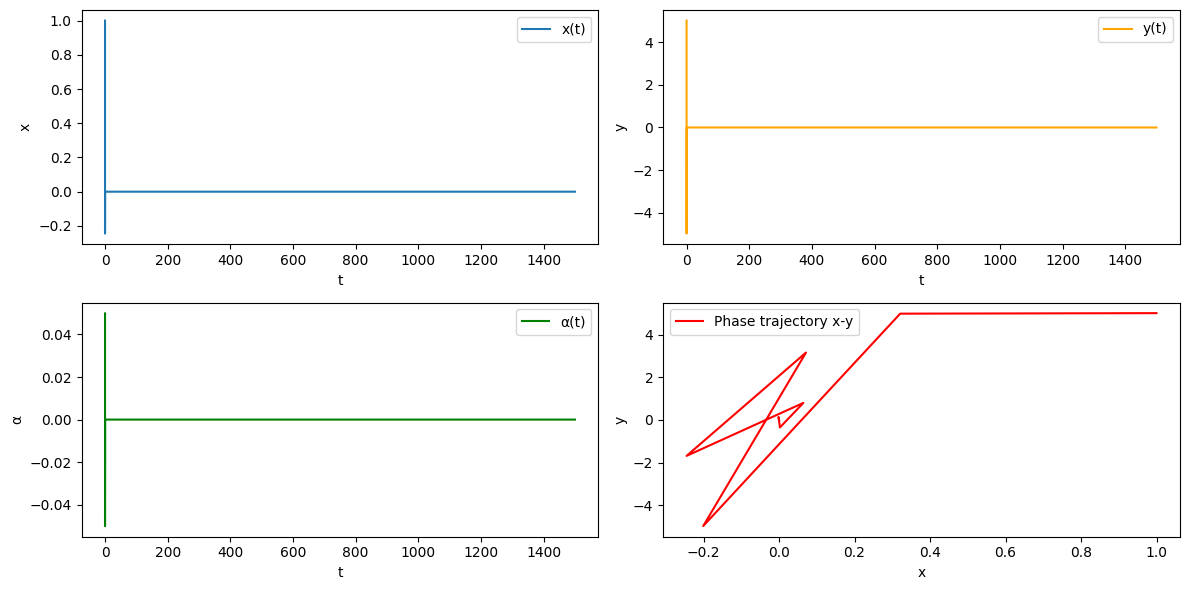

In [72]:
epsilon = 0.01
Tk = 1500  
h = 0.001    
N = int(Tk / h)

x0 = 1.0   # x0 ∈ [0,3]
y0 = 5.0   # y0 ∈ [0,15]
alpha0 = 0.05  # α0 << 1

t_values = np.linspace(0, Tk, N+1)
y_values = np.zeros((N+1, 3))  
y_values[0, :] = [x0, y0, alpha0]

beta0 = 11/6
beta1 = -3
beta2 = 1.5
beta3 = -1/3

max_iter = 20
tol = 1e-8

for n in range(N):
    if n < 3:
        # RK4 
        y_n = y_values[n, :]
        k1 = f(y_n, epsilon)
        k2 = f(y_n + 0.5 * h * k1, epsilon)
        k3 = f(y_n + 0.5 * h * k2, epsilon)
        k4 = f(y_n + h * k3, epsilon)
        y_next = y_n + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        y_values[n+1, :] = y_next

    else:
        # Gear's 
        RHS = beta1 * y_values[n, :] + beta2 * y_values[n-1, :] + beta3 * y_values[n-2, :]
        y_guess = y_values[n, :]  

        for iteration in range(max_iter):
            G = beta0 * y_guess - h * f(y_guess, epsilon) - RHS
            norm_G = np.linalg.norm(G, ord=2)
            if norm_G < tol:
                break
            J = beta0 * np.eye(3) - h * jacobian_f(y_guess, epsilon)
            delta = np.linalg.solve(J, -G)
            y_guess += delta
        else:
            print(f"Newton's method did not converge at step {n}, norm of G = {norm_G}")

        y_values[n+1, :] = y_guess

x_values = y_values[:, 0]
y_plot_values = y_values[:, 1]
alpha_values = y_values[:, 2]

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(t_values, x_values, label='x(t)')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t_values, y_plot_values, label='y(t)', color='orange')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(t_values, alpha_values, label='α(t)', color='green')
plt.xlabel('t')
plt.ylabel('α')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(x_values, y_plot_values, label='x-y', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()